# MI-ADM: home assignment 2

  * **Deadline**: 15.05.2019 -2 points for late submission, the hard deadline is the first day of the exam period.
  * **What to submit**: Just this notebook with your code and texts, not the dataset!
  * **How to submit**: See the instructions at https://courses.fit.cvut.cz/MI-ADM/tutorials/index.html.
  
Generally speaking, the goal of this assignment is to apply **support vector machines on a classification problem**.

What to do:
  * Use the data from Spambase dataset http://archive.ics.uci.edu/ml/datasets/spambase.
  * Train Support Vector Machine classification model directly (without any kernel approach) and evaluate its accuracy.
  * Train Support Vector Machine classification model based on a kernel function (RBF, polynomial, etc.) of your choice and evaluate its accuracy.
  * Compare the results with a random forest model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, recall_score

## Read dataset

In [2]:
with open('spambase/spambase.names') as f:
    columns = []
    lines = f.readlines()
    for line in lines[33:]:
        columns.append(line.split(':')[0])        
    columns.append('spam')

df = pd.read_csv('spambase/spambase.data', names=columns)

In [3]:
df.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

### Preprocessing

We will apply normalization on the dataset for better performance of SVM

In [5]:
x = df.drop(columns=['spam']).values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

### Split Dataset

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, df['spam'].values, test_size=0.25, random_state=16) 


## Spam Classifier

### ROC curve
Mesuring performance of classifier with ROC and AUC.

In [7]:
def plot_roc_curve(pred_prob, x_test):
    fpr, tpr, tresholds = roc_curve(y_test, pred_prob[:, 1])

    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, marker='x', label='ROC')
    plt.plot([0, 1], [0, 1], label='Luck', linestyle='--', color='red')
    plt.title(f'ROC (AUC={roc_auc})')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [8]:
def hyperparam_search(model, x, y, nfolds, params):

    grid_search = GridSearchCV(model, params, cv=nfolds)
    
    grid_search.fit(x, y)
    
    return grid_search.best_params_

### Support Vector Machines

In [9]:
clf = SVC(gamma='auto', probability=True)

params = {
    'C': [0.001, 0.01, 0.1, 1, 2],
    'gamma': [0.001, 0.01, 0.1, 1]
}

print(hyperparam_search(clf, x_scaled, df['spam'].values, 4, params))

# model = clf.fit(x_train, y_train)
# y_pred = model.predict(x_test)

# print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

{'C': 2, 'gamma': 1}


Accuracy:0.9244135534317984
F1-score: 0.9019165727170237


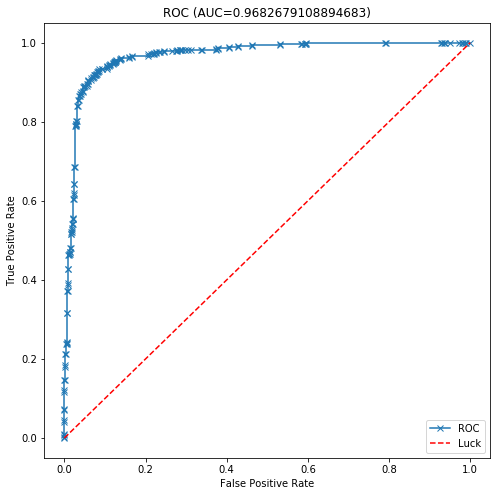

In [10]:
clf = SVC(gamma=1, C=2, probability=True)

model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Accuracy:{accuracy_score(y_test, y_pred)}')
pred_prob = model.predict_proba(x_test)
plot_roc_curve(pred_prob, x_test)
print(f'F1-score: {f1_score(y_pred, y_test)}')

### SVM with Kernel

In [22]:
kernels = ['rbf', 'poly']

In [ ]:
for kernel in kernels:
    
    clf = SVC(kernel=kernel, gamma='auto', probability=True)
    
    params = {
        'C': [0.001, 0.01, 0.1, 1, 2],
        'gamma': [0.001, 0.01, 0.1, 1, 2],
        'degree': [0, 1, 2, 3, 4, 5, 6]
    }
    
    print(f'Kernel: {kernel}')
    print(hyperparam_search(clf, x_scaled, df['spam'].values, 4, params))

### RBF

Accuracy:0.9244135534317984
F1-score: 0.9019165727170237


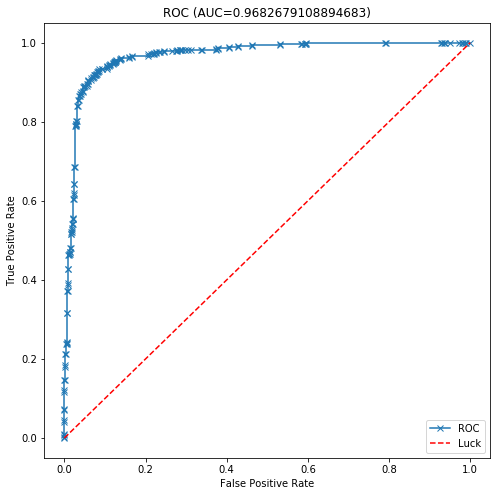

In [28]:
clf = SVC(kernel='rbf', gamma=1, C=2, degree=2, probability=True)

model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Accuracy:{accuracy_score(y_test, y_pred)}')
pred_prob = model.predict_proba(x_test)
plot_roc_curve(pred_prob, x_test)
print(f'F1-score: {f1_score(y_pred, y_test)}')

### Polynomial

Accuracy:0.7106863596872285
F1-score: 0.4422110552763818


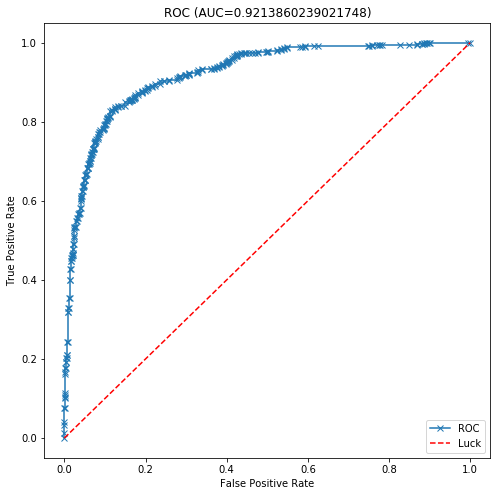

In [14]:
clf = SVC(kernel='poly', gamma=1, C=2, probability=True)

model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Accuracy:{accuracy_score(y_test, y_pred)}')
pred_prob = model.predict_proba(x_test)
plot_roc_curve(pred_prob, x_test)
print(f'F1-score: {f1_score(y_pred, y_test)}')

### Random Forrest

In [16]:
clf = RandomForestClassifier(n_estimators=500)

params = {
    'n_estimators': [10, 50, 100, 250]
}
    
print(f'Kernel: {kernel}')
print(hyperparam_search(clf, x_scaled, df['spam'].values, 4, params))


model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

Kernel: poly
{'n_estimators': 100}
Accuracy:0.9574283231972198


Accuracy:0.9574283231972198
F1-score: 0.9462129527991219


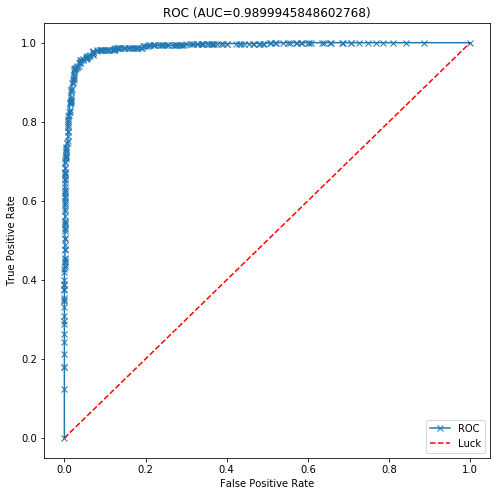

In [17]:
clf = RandomForestClassifier(n_estimators=500)

model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Accuracy:{accuracy_score(y_test, y_pred)}')
pred_prob = model.predict_proba(x_test)
plot_roc_curve(pred_prob, x_test)
print(f'F1-score: {f1_score(y_pred, y_test)}')

## Conclusion

For the classification we used Random Forest and SVM using linear, polyonmial and RBF kernel. We used GridSearch for finding the best performing hyperparameters.

Surprisingly, the best accuracy and highest AUC has Random Forrest.